In [ ]:
!pip install torch torchvision matplotlib
!pip install ipython-autotime
%load_ext autotime

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl.metadata (1.8 kB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinu

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from torch.utils.data import DataLoader, random_split
import torch.nn as nn
import torch.optim as optim
from torchvision import models
import matplotlib.pyplot as plt
import numpy as np
import os

time: 5.36 s (started: 2024-08-06 00:27:52 +00:00)


In [ ]:
# !unzip '/content/5.zip'
# !unzip '/content/10.zip'
# !unzip '/content/15.zip'
# !unzip '/content/20.zip'
# !unzip '/content/Wavelet.zip'
# !unzip '/content/Pre-trained-pAE.zip'
# !unzip '/content/Tuned-pAE.zip'


!unzip '/content/Non-temporal.zip'

Archive:  /content/Non-temporal.zip
   creating: Non-temporal/animals/
  inflating: Non-temporal/animals/001 (1).jpeg  
  inflating: Non-temporal/animals/002 (1).jpeg  
  inflating: Non-temporal/animals/003 (1).jpeg  
  inflating: Non-temporal/animals/004 (1).jpeg  
  inflating: Non-temporal/animals/005 (1).jpeg  
  inflating: Non-temporal/animals/006 (1).jpeg  
  inflating: Non-temporal/animals/007 (1).jpeg  
  inflating: Non-temporal/animals/008 (1).jpeg  
  inflating: Non-temporal/animals/009 (1).jpeg  
  inflating: Non-temporal/animals/010 (1).jpeg  
  inflating: Non-temporal/animals/011 (1).jpeg  
  inflating: Non-temporal/animals/012 (1).jpeg  
  inflating: Non-temporal/animals/013 (1).jpeg  
  inflating: Non-temporal/animals/014 (1).jpeg  
  inflating: Non-temporal/animals/015 (1).jpeg  
  inflating: Non-temporal/animals/016 (1).jpeg  
  inflating: Non-temporal/animals/017 (1).jpeg  
  inflating: Non-temporal/animals/018 (1).jpeg  
  inflating: Non-temporal/animals/019 (1).jpeg 

In [ ]:
# Define the directory path
# data_dir = '/content/5'
# data_dir = '/content/10'
# data_dir = '/content/15'
# data_dir = '/content/20'
# data_dir = '/content/Wavelet'
# data_dir = '/content/Pre-trained-pAE'
# data_dir = '/content/Tuned-pAE'


data_dir = '/content/Non-temporal'


# Data transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    # transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Load the dataset
dataset = datasets.ImageFolder(root=data_dir, transform=transform)

time: 2.53 ms (started: 2024-08-06 00:30:32 +00:00)


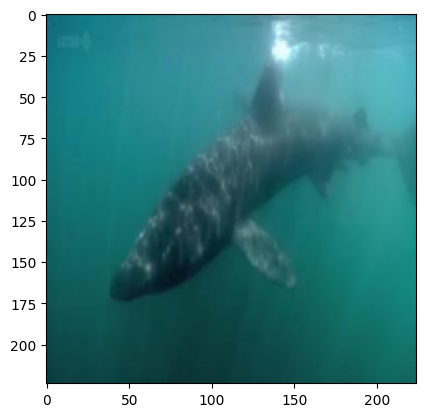

time: 244 ms (started: 2024-08-06 00:30:32 +00:00)


In [ ]:
train_size = int(0.7 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# print(train_dataset[0])
plt.imshow(dataset[0][0].permute(1, 2, 0), cmap='gray')
plt.show()
# imshow(train_dataset[0])
# print(len(test_dataset))

In [ ]:
# Arrays to store the accuracy and loss
Accuracy_array = []
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

for i in range(1):
  # Split the dataset into training and testing sets
  train_size = int(0.8 * len(dataset))
  test_size = len(dataset) - train_size
  train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

  # Create data loaders
  train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
  test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)



  # Load the pretrained AlexNet model
  model = models.alexnet(pretrained=True)

  # Modify the classifier for binary classification
  model.classifier[6] = nn.Linear(4096, 2)

  # Check if GPU is available and move the model to GPU
  device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
  model = model.to(device)



  criterion = nn.CrossEntropyLoss()
  optimizer = optim.Adam(model.parameters(), lr=0.0005)


  num_epochs = 20


  for epoch in range(num_epochs):
      model.train()
      running_loss = 0.0
      correct_train = 0
      total_train = 0
      for inputs, labels in train_loader:
          inputs, labels = inputs.to(device), labels.to(device)

          optimizer.zero_grad()

          outputs = model(inputs)
          loss = criterion(outputs, labels)
          loss.backward()
          optimizer.step()

          running_loss += loss.item() * inputs.size(0)

          _, predicted = torch.max(outputs, 1)
          total_train += labels.size(0)
          correct_train += (predicted == labels).sum().item()

      epoch_loss = running_loss / len(train_loader.dataset)
      train_losses.append(epoch_loss)

      train_accuracy = 100 * correct_train / total_train
      train_accuracies.append(train_accuracy)
      print(f'Epoch {epoch+1}/{num_epochs}, Train Loss: {epoch_loss:.4f}, Train Accuracy: {train_accuracy:.2f}%')


      # Validation loss calculation
      model.eval()
      val_loss = 0.0
      correct_val = 0
      total_val = 0
      with torch.no_grad():
          for inputs, labels in test_loader:
              inputs, labels = inputs.to(device), labels.to(device)
              outputs = model(inputs)
              loss = criterion(outputs, labels)
              val_loss += loss.item() * inputs.size(0)

              _, predicted = torch.max(outputs, 1)
              total_val += labels.size(0)
              correct_val += (predicted == labels).sum().item()

      val_loss = val_loss / len(test_loader.dataset)
      val_losses.append(val_loss)

      val_accuracy = 100 * correct_val / total_val
      val_accuracies.append(val_accuracy)

      print(f'Epoch {epoch+1}/{num_epochs}, Val Loss: {val_loss:.4f}, Val Accuracy: {val_accuracy:.2f}%')

  model.eval()
  correct = 0
  total = 0
  with torch.no_grad():
      for inputs, labels in test_loader:
          inputs, labels = inputs.to(device), labels.to(device)
          outputs = model(inputs)
          _, predicted = torch.max(outputs, 1)
          total += labels.size(0)
          correct += (predicted == labels).sum().item()

  accuracy = 100 * correct / total
  Accuracy_array.append(accuracy)

  print('----------------------------------')
  print(f'Final accuracy for run {i}: {accuracy:.2f}%')
  print('----------------------------------')

Epoch 1/20, Train Loss: 1.0916, Train Accuracy: 48.47%
Epoch 1/20, Val Loss: 0.7045, Val Accuracy: 41.46%
Epoch 2/20, Train Loss: 0.6740, Train Accuracy: 61.35%
Epoch 2/20, Val Loss: 0.6791, Val Accuracy: 48.78%
Epoch 3/20, Train Loss: 0.7167, Train Accuracy: 53.37%
Epoch 3/20, Val Loss: 0.6948, Val Accuracy: 43.90%
Epoch 4/20, Train Loss: 0.6761, Train Accuracy: 62.58%
Epoch 4/20, Val Loss: 0.6828, Val Accuracy: 58.54%
Epoch 5/20, Train Loss: 0.7517, Train Accuracy: 47.85%
Epoch 5/20, Val Loss: 0.6753, Val Accuracy: 58.54%
Epoch 6/20, Train Loss: 0.6880, Train Accuracy: 53.99%
Epoch 6/20, Val Loss: 0.6802, Val Accuracy: 51.22%
Epoch 7/20, Train Loss: 0.6520, Train Accuracy: 61.35%
Epoch 7/20, Val Loss: 0.6257, Val Accuracy: 60.98%
Epoch 8/20, Train Loss: 0.7131, Train Accuracy: 53.99%
Epoch 8/20, Val Loss: 0.6668, Val Accuracy: 58.54%
Epoch 9/20, Train Loss: 0.6620, Train Accuracy: 63.80%
Epoch 9/20, Val Loss: 0.7636, Val Accuracy: 48.78%
Epoch 10/20, Train Loss: 0.6708, Train Accurac

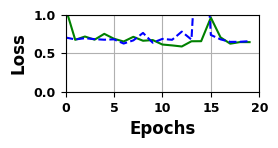

time: 105 ms (started: 2024-08-06 00:30:55 +00:00)


In [ ]:
# Plotting the training and validation loss
plt.figure(figsize=(2.5,1))
plt.plot(train_losses, label='Training Loss', color='green')
plt.plot(val_losses, label='Validation Loss', linestyle='dashed', color='blue')
# plt.title('Training and Validation Loss over Epochs'
plt.xlabel('Epochs', fontsize=12, fontweight='bold')
plt.ylabel('Loss', fontsize=12, fontweight='bold')
# plt.title('Training and Validation Loss over Epochs')
# plt.legend()
plt.xlim(0, 20)  # Assuming 30 epochs; adjust accordingly
plt.ylim(0, 1)  # Adjust the y-axis limit based on the loss range
plt.yticks([0, 0.5, 1], fontsize=9, fontweight='bold')  # Set specific y-axis ticks
plt.xticks([0, 5, 10, 15, 20], fontsize=9, fontweight='bold')
plt.grid(True)
plt.show()

In [ ]:
LTFAT_5 = [46.34, 46.34, 53.66, 51.22, 48.78, 58.54, 48.78, 75.61, 56.10, 46.34]
LTFAT_10 = [60.98, 56.10, 60.98, 68.29, 56.10, 63.41, 39.02, 48.78, 48.78, 68.29]
LTFAT_15 = [60.98, 73.17, 56.10, 60.98, 58.54, 48.78, 65.85, 60.98, 63.41, 70.73]
LTFAT_20 = [43.90, 60.98, 48.78, 51.22, 58.54, 53.66, 60.98, 68.29, 48.78, 58.54]
Wavelet = [60.98, 63.41, 46.34, 58.54,43.90, 58.54, 75.61, 75.61, 70.73, 63.41]
Pre_trained_pAE = [65.85, 63.41, 78.05, 68.29, 58.54, 53.66, 68.29, 70.73, 60.98, 70.73]
Tuned_pAE = [100.00, 100.00, 100.00, 100.00, 95.12, 100.00, 100.00, 97.56, 100.00, 100.00]
Non_temporal = [56.10, 51.22, 65.85, 78.05, 70.73, 56.10, 75.61, 58.54, 78.05, 75.61]

mean_LTFAT_5 = np.mean(LTFAT_5)
std_LTFAT_5 = np.std(LTFAT_5)
print(f"Mean LTFAT_5: {mean_LTFAT_5}")
print(f"Standard Deviation LTFAT_5: {std_LTFAT_5}")
print('----------------------------------')

mean_LTFAT_10 = np.mean(LTFAT_10)
std_LTFAT_10 = np.std(LTFAT_10)
print(f"Mean LTFAT_10: {mean_LTFAT_10}")
print(f"Standard Deviation LTFAT_10: {std_LTFAT_10}")
print('----------------------------------')

mean_LTFAT_15 = np.mean(LTFAT_15)
std_LTFAT_15 = np.std(LTFAT_15)
print(f"Mean LTFAT_15: {mean_LTFAT_15}")
print(f"Standard Deviation LTFAT_15: {std_LTFAT_15}")
print('----------------------------------')

mean_LTFAT_20 = np.mean(LTFAT_20)
std_LTFAT_20 = np.std(LTFAT_20)
print(f"Mean LTFAT_20: {mean_LTFAT_20}")
print(f"Standard Deviation LTFAT_20: {std_LTFAT_20}")
print('----------------------------------')


mean_Wavelet = np.mean(Wavelet)
std_Wavelet = np.std(Wavelet)
print(f"Mean Wavelet: {mean_Wavelet}")
print(f"Standard Deviation Wavelet: {std_Wavelet}")
print('----------------------------------')


mean_Pre_trained_pAE = np.mean(Pre_trained_pAE)
std_Pre_trained_pAE = np.std(Pre_trained_pAE)
print(f"Mean Pre_trained_pAE: {mean_Pre_trained_pAE}")
print(f"Standard Deviation Pre_trained_pAE: {std_Pre_trained_pAE}")
print('----------------------------------')


mean_Tuned_pAE = np.mean(Tuned_pAE)
std_Tuned_pAE = np.std(Tuned_pAE)
print(f"Mean Tuned_pAE: {mean_Tuned_pAE}")
print(f"Standard Deviation Tuned_pAE: {std_Tuned_pAE}")
print('----------------------------------')



mean_Non_temporal = np.mean(Non_temporal)
std_Non_temporal = np.std(Non_temporal)
print(f"Mean Non_temporal: {mean_Non_temporal}")
print(f"Standard Deviation Non_temporal: {std_Non_temporal}")
print('----------------------------------')




Mean LTFAT_5: 53.17100000000001
Standard Deviation LTFAT_5: 8.50593257673725
----------------------------------
Mean LTFAT_10: 57.073
Standard Deviation LTFAT_10: 8.875139491861523
----------------------------------
Mean LTFAT_15: 61.952
Standard Deviation LTFAT_15: 6.651620554421306
----------------------------------
Mean LTFAT_20: 55.367
Standard Deviation LTFAT_20: 6.9895064918776635
----------------------------------
Mean Wavelet: 61.706999999999994
Standard Deviation Wavelet: 10.235350555794364
----------------------------------
Mean Pre_trained_pAE: 65.85300000000001
Standard Deviation Pre_trained_pAE: 6.6338420994172
----------------------------------
Mean Tuned_pAE: 99.268
Standard Deviation Tuned_pAE: 1.5623623139336136
----------------------------------
Mean Non_temporal: 66.586
Standard Deviation Non_temporal: 9.819320954118975
----------------------------------
time: 10.2 ms (started: 2024-08-06 00:30:55 +00:00)
